### ML ASSISTED CLASSIFICATION OF LATERITE MATERIAL BASED ON GEOTECHNICAL PROPERTIES

In [87]:

#For data handling and preprocessing
import pandas as pd
import numpy as np
import random 

#For visualization
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline 

#For scaling dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Models from Scikit-Learn



In [88]:
dataset = pd.read_csv("lateritelarge.csv")
dataset.head(100)

,Laterite Type,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
0,ILT,0.75,15.00,2.66,2.08,2525,1.61,2.18,32
1,LT,5.00,9.50,1.90,1.55,2228,2.05,3.91,24
2,LTC,8.00,5.09,0.90,0.86,1437,1.87,4.76,16
3,LLT,15.00,22.65,3.22,2.81,3002,3.20,1.74,35
4,ILT,1.25,14.89,2.27,1.75,2298,1.77,2.00,35
...,...,...,...,...,...,...,...,...,...
95,ILT,13.63,15.17,1.46,0.74,2032,1.64,3.42,15
96,LT,2.66,8.48,2.48,2.47,2757,3.12,3.55,45
97,LT,10.22,13.63,1.29,2.32,1746,2.71,1.60,33
98,LLT,8.40,22.66,3.13,1.89,3082,1.52,4.66,21


In [89]:
dataset.shape

(5050, 9)

In [90]:
dataset.isnull().sum()

Laterite Type    0
Ds               0
UCS              0
IS50             0
TS               0
Pw               0
Di               0
Mc               0
RQD              0
dtype: int64

In [91]:
class_counts = dataset['Laterite Type'].value_counts()
print("\nCount of each class:")
print(class_counts)


Count of each class:
Laterite Type
ILT    1288
LTC    1269
LLT    1265
LT     1228
Name: count, dtype: int64


In [92]:
dataset.describe()

,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
count,5050.000000,5050.000000,5050.00000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,10.142471,14.216707,1.89417,1.651796,2303.599802,2.508362,3.226505,30.071881
std,5.599407,6.359251,0.91324,0.782217,516.872649,0.575371,0.998645,11.731624
min,0.500000,3.000000,0.30000,0.300000,1401.000000,1.500000,1.500000,10.000000
25%,5.280000,8.660000,1.11000,0.980000,1865.000000,2.010000,2.370000,20.000000
50%,10.220000,14.325000,1.89000,1.640000,2306.500000,2.510000,3.220000,30.000000
75%,14.937500,19.767500,2.65000,2.340000,2746.000000,3.020000,4.060000,40.000000
max,20.000000,25.000000,3.50000,3.000000,3200.000000,3.500000,5.000000,50.000000


In [93]:
dataset = dataset.replace({'Laterite Type': {'ILT': 1, 'LT': 2, 'LTC': 3, 'LLT': 4}})

C:\Users\Vijay Kumar\AppData\Local\Temp\ipykernel_2636\2903027459.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'Laterite Type': {'ILT': 1, 'LT': 2, 'LTC': 3, 'LLT': 4}})


In [94]:

#converting Categorical datatype of Laterite type into numerical ttype

ILT =1
LT=2
LTC=3
LLT=4

In [95]:
dataset = dataset.replace({'Laterite Type': {'ILT': 1, 'LT': 2, 'LTC': 3, 'LLT': 4}})

In [96]:
df=dataset.head(100)

In [97]:
df=dataset.head(100)
df

,Laterite Type,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
0,1,0.75,15.00,2.66,2.08,2525,1.61,2.18,32
1,2,5.00,9.50,1.90,1.55,2228,2.05,3.91,24
2,3,8.00,5.09,0.90,0.86,1437,1.87,4.76,16
3,4,15.00,22.65,3.22,2.81,3002,3.20,1.74,35
4,1,1.25,14.89,2.27,1.75,2298,1.77,2.00,35
...,...,...,...,...,...,...,...,...,...
95,1,13.63,15.17,1.46,0.74,2032,1.64,3.42,15
96,2,2.66,8.48,2.48,2.47,2757,3.12,3.55,45
97,2,10.22,13.63,1.29,2.32,1746,2.71,1.60,33
98,4,8.40,22.66,3.13,1.89,3082,1.52,4.66,21


In [98]:
# Basic Info
print("Dataset Overview:\n")
print(dataset.info())
print("\nSummary Statistics:\n")
print(dataset.describe())

#Purpose: To understand the structure and composition of the dataset.


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Laterite Type  5050 non-null   int64  
 1   Ds             5050 non-null   float64
 2   UCS            5050 non-null   float64
 3   IS50           5050 non-null   float64
 4   TS             5050 non-null   float64
 5   Pw             5050 non-null   int64  
 6   Di             5050 non-null   float64
 7   Mc             5050 non-null   float64
 8   RQD            5050 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 355.2 KB
None

Summary Statistics:

       Laterite Type           Ds          UCS        IS50           TS  \
count    5050.000000  5050.000000  5050.000000  5050.00000  5050.000000   
mean        2.497228    10.142471    14.216707     1.89417     1.651796   
std         1.123090     5.599407     6.359251     0.91324     0.782217   
min         

In [99]:
# Unique values per column
print("\nUnique Values:\n")
print(df.nunique())

#Purpose: Understand the diversity of categorical and numerical features.


Unique Values:

Laterite Type     4
Ds               88
UCS              97
IS50             85
TS               86
Pw               98
Di               75
Mc               88
RQD              37
dtype: int64


C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


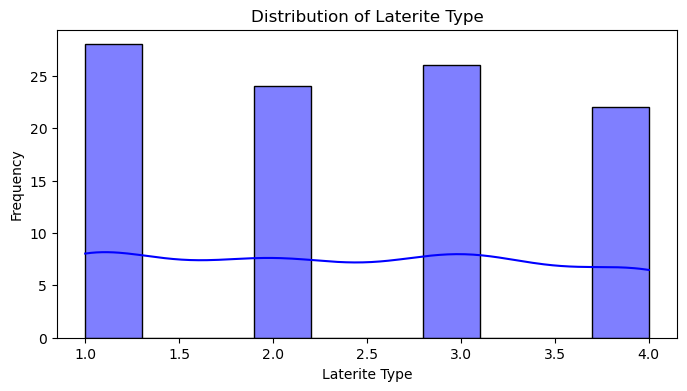

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


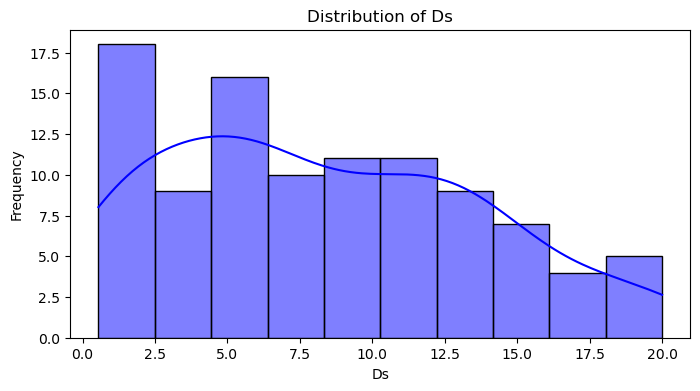

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


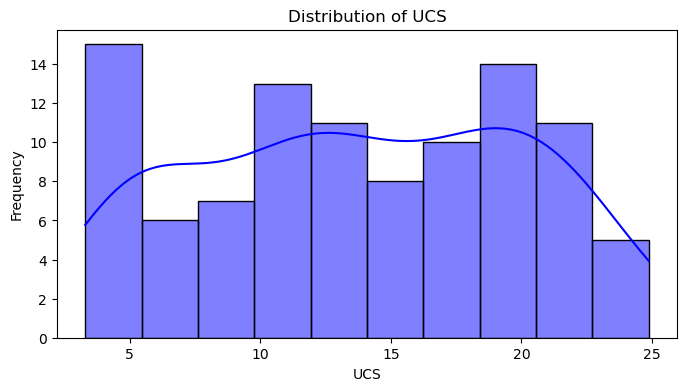

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


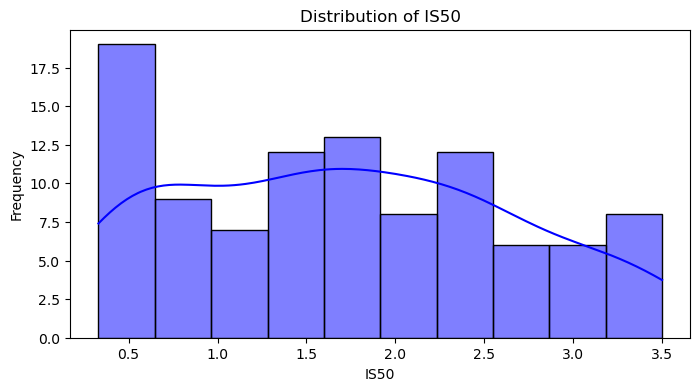

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


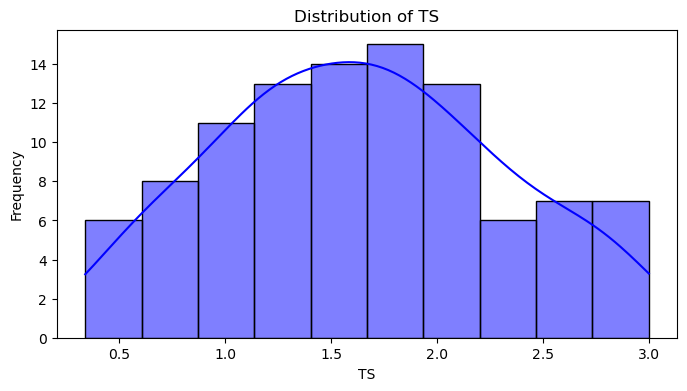

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


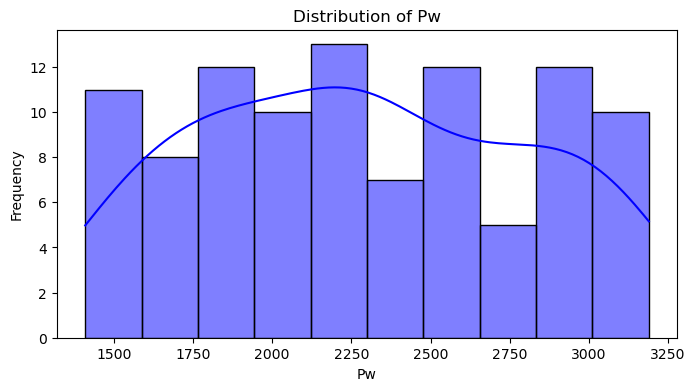

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


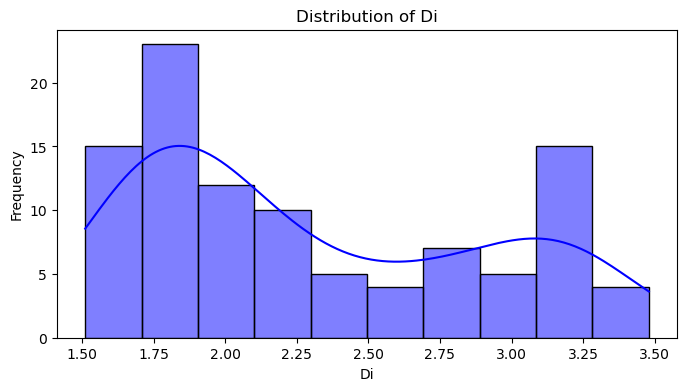

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


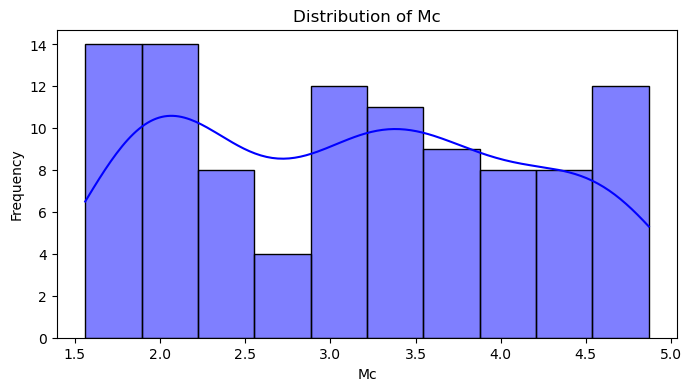

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


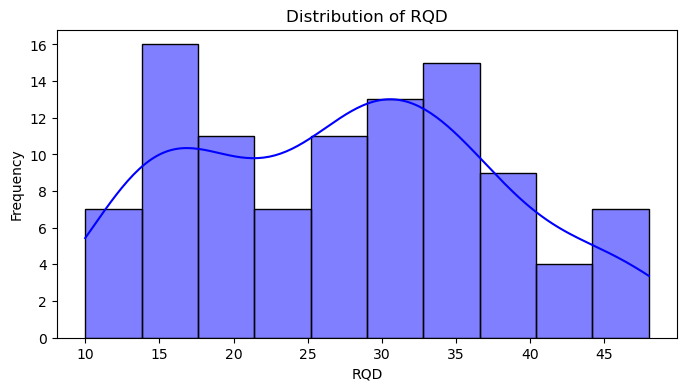

In [100]:
# Visualizing distributions for numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    
#Purpose: Visualize how numerical data is spread across the dataset.
#Methods:
#Histograms:Used to view the frequency distribution.Helps identify skewness and outliers.

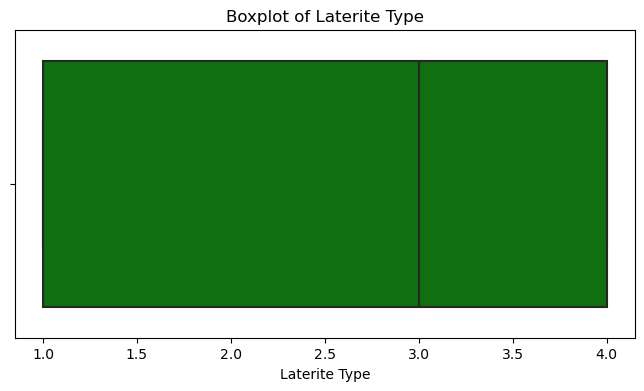

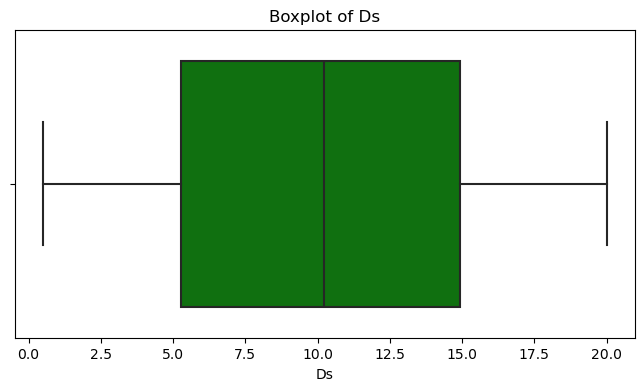

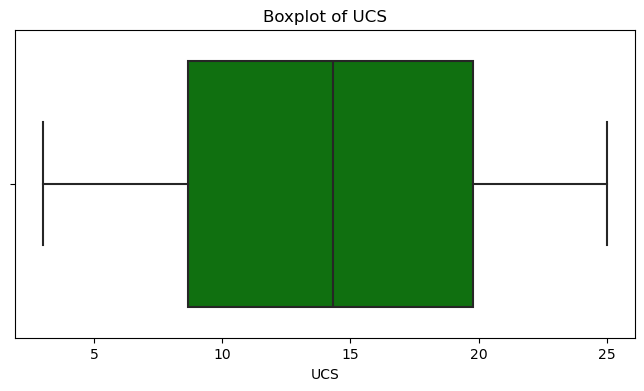

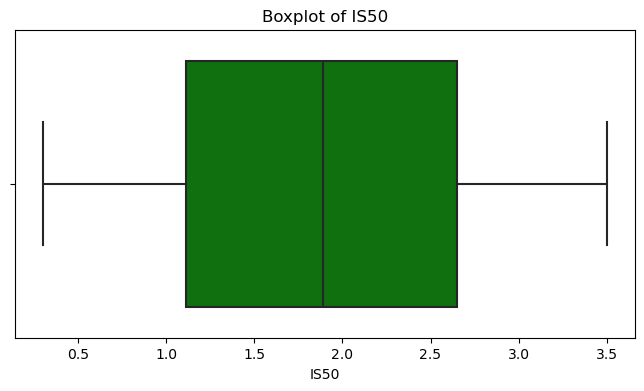

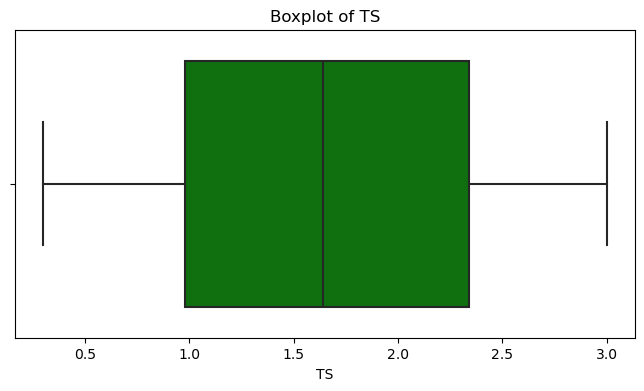

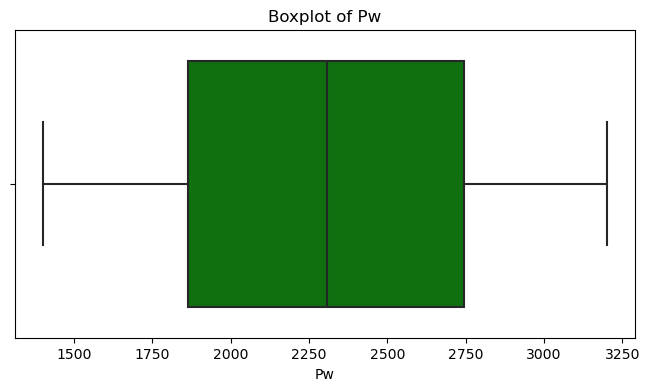

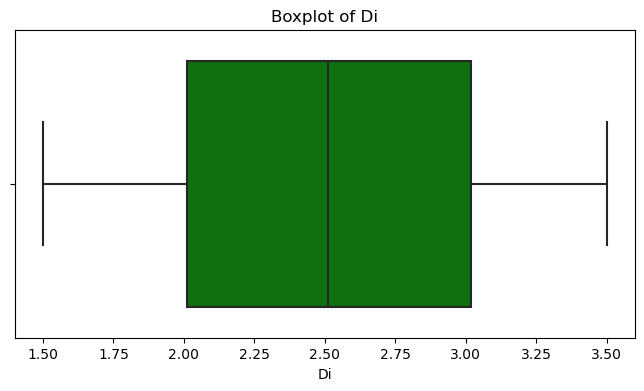

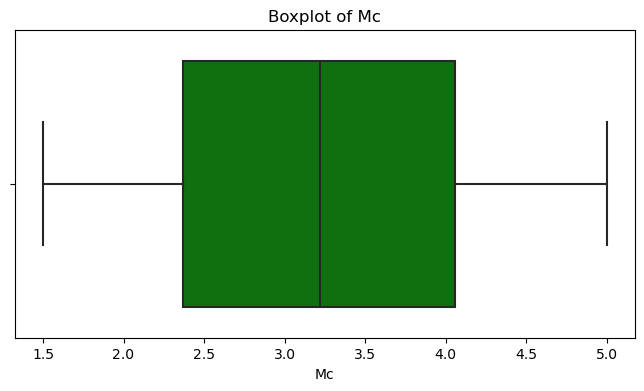

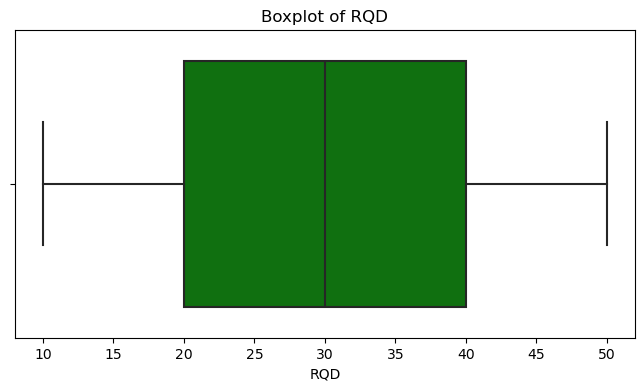

In [101]:
# Boxplots to check for outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=dataset, x=col, color='green')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

#Purpose: Highlight extreme values which may bias the analysis.

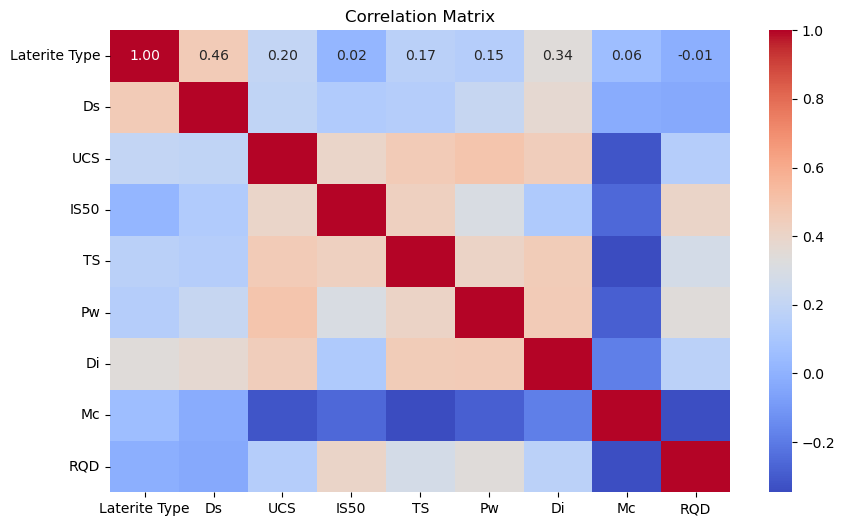

In [102]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#(Correlation AnalysisPurpose: Determine relationships between numerical variables.Method:Correlation Matrix:
#Measures the linear relationship between variables.
#Values range from -1 (strong negative) to +1 (strong positive).)

C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wi

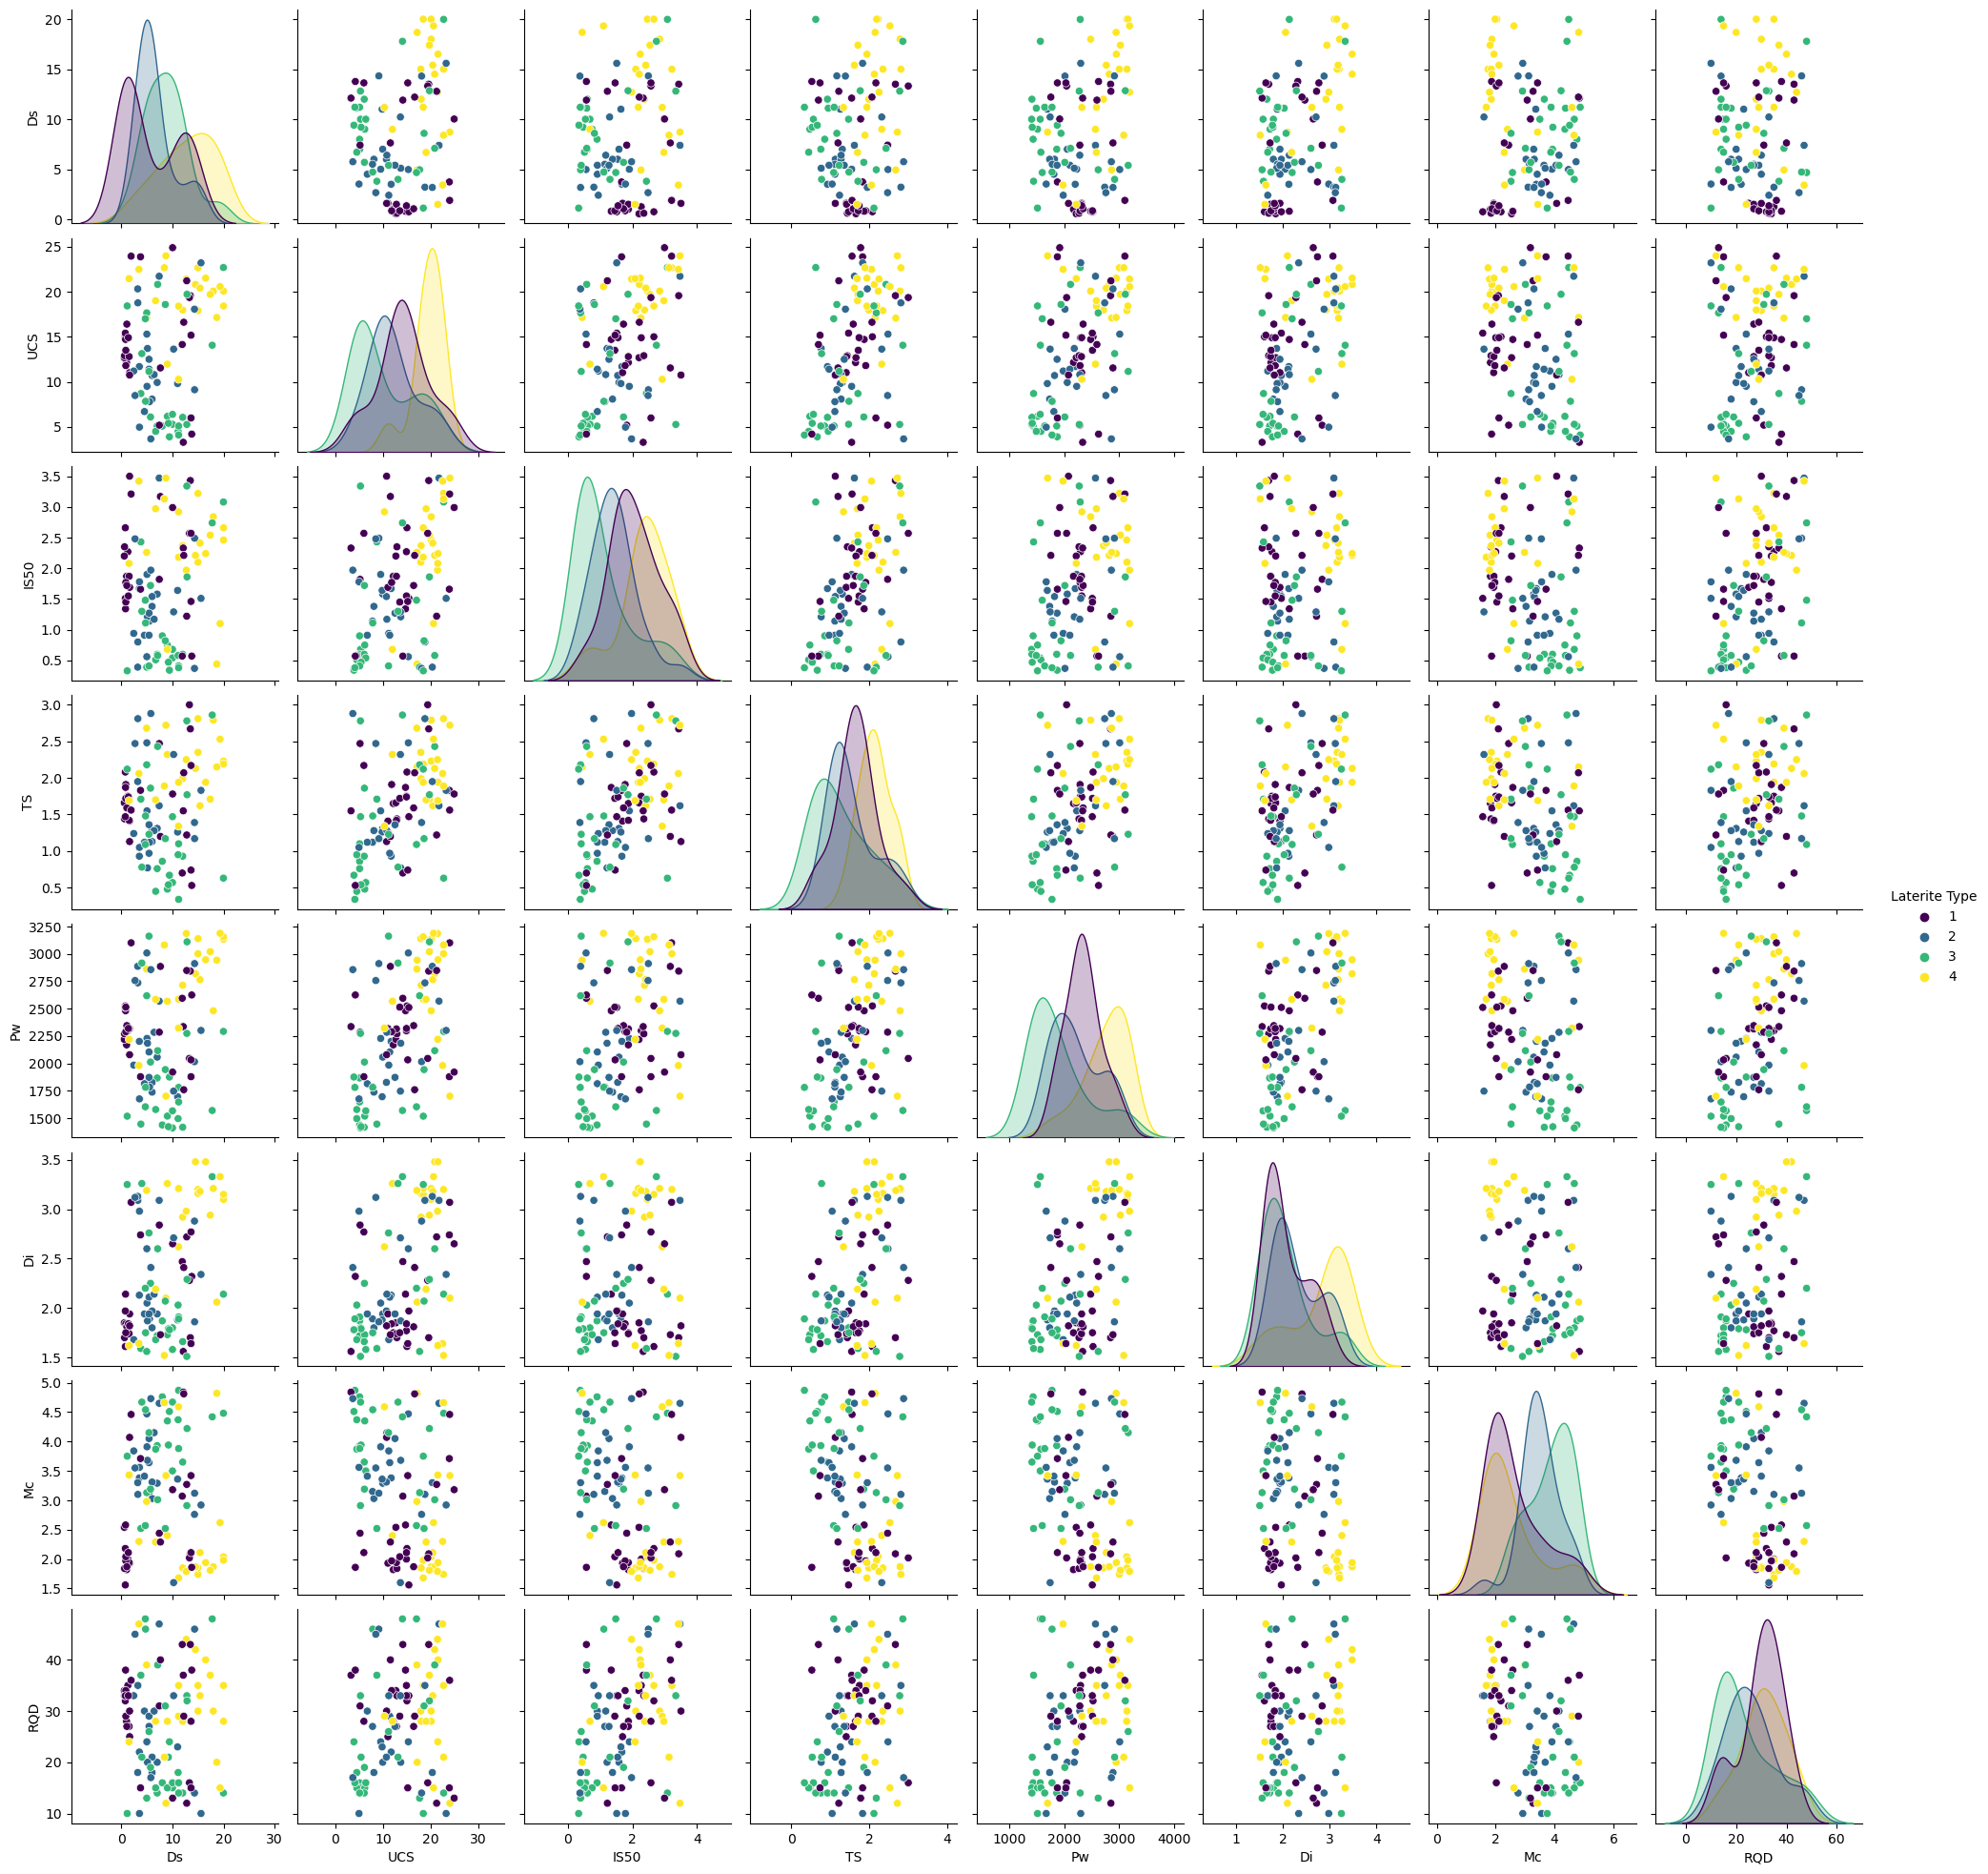

In [103]:

# Pairplot for pairwise relationships
sns.pairplot(df, hue="Laterite Type", palette="viridis")
plt.show()
#Purpose: Analyze how features interact with each other.

In [104]:
# Grouped analysis for categorical data
print("\nGrouped Statistics by Laterite Type:\n")
print(df.groupby("Laterite Type").mean())

#Purpose: Study the effect of categorical variables on numerical variables.


Grouped Statistics by Laterite Type:

                      Ds        UCS      IS50        TS           Pw  \
Laterite Type                                                          
1               5.787143  14.207857  2.054643  1.654643  2345.892857   
2               6.597083  12.125417  1.432083  1.553750  2218.083333   
3               8.778462  10.103846  1.090385  1.277308  1898.846154   
4              12.705000  19.356818  2.348636  2.137727  2745.727273   

                     Di        Mc        RQD  
Laterite Type                                 
1              2.086786  2.643571  29.785714  
2              2.314583  3.498333  25.958333  
3              2.076923  3.860769  23.653846  
4              2.797273  2.547273  30.909091  


C:\Users\Vijay Kumar\AppData\Local\Temp\ipykernel_2636\3850744627.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Laterite Type", y="UCS", ci=None, palette="muted")


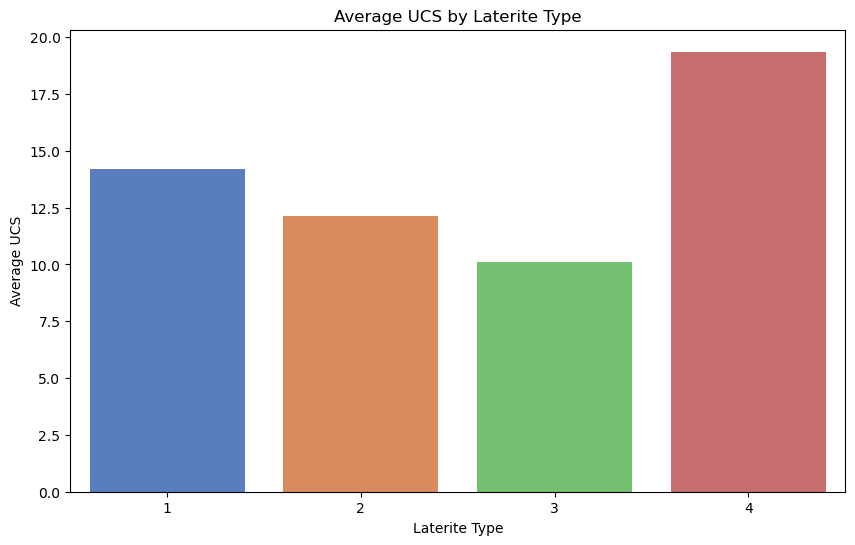

In [105]:
# Visualize group-wise statistics
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Laterite Type", y="UCS", ci=None, palette="muted")
plt.title("Average UCS by Laterite Type")
plt.xlabel("Laterite Type")
plt.ylabel("Average UCS")
plt.show()




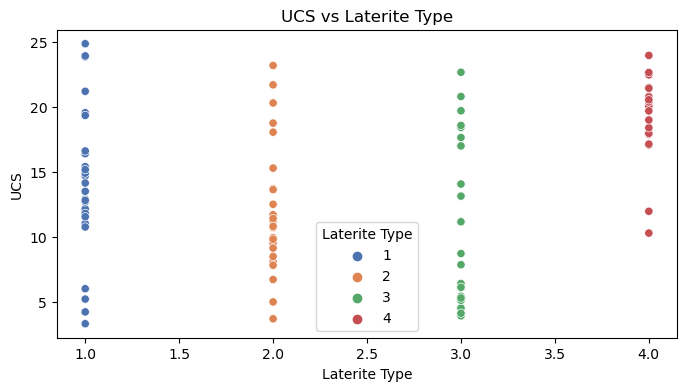

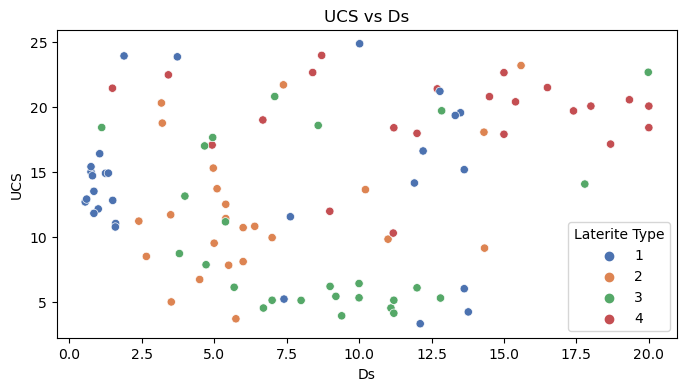

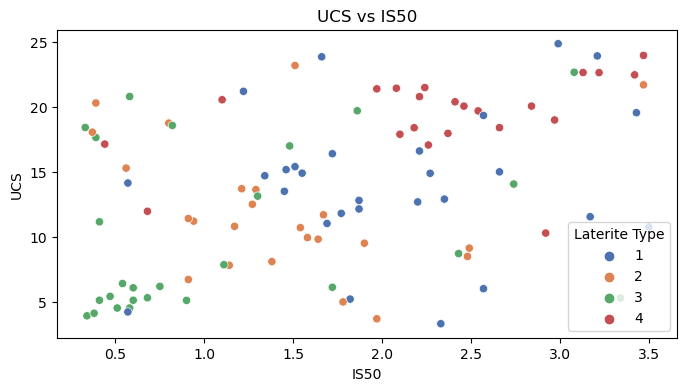

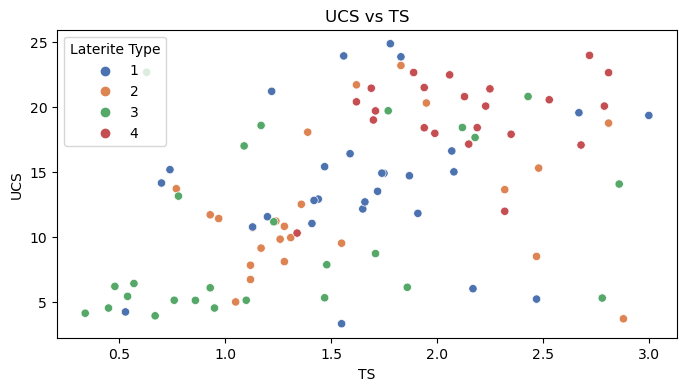

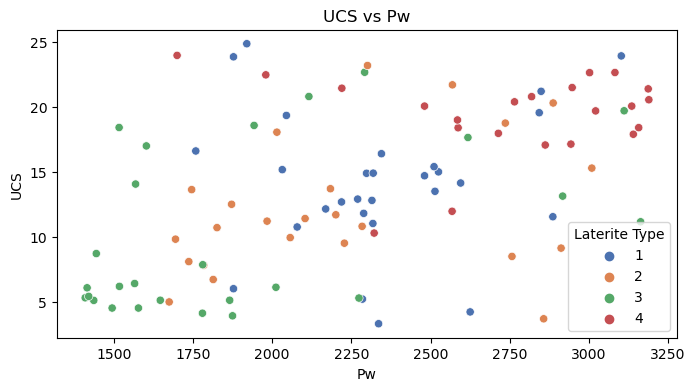

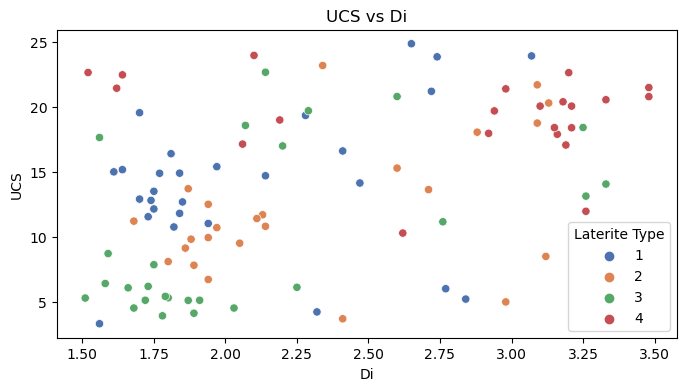

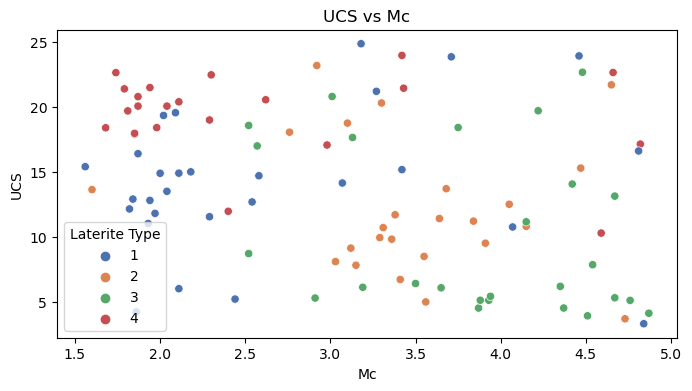

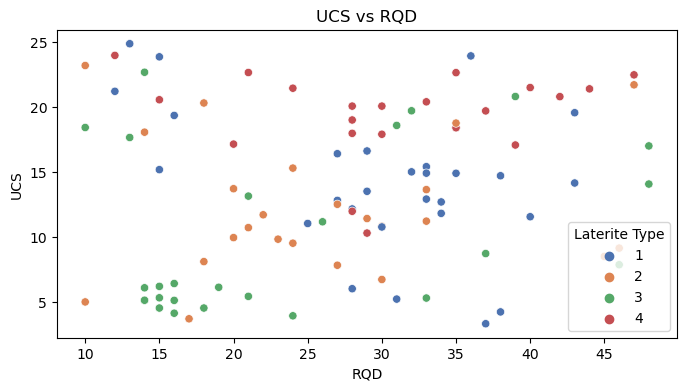

In [106]:
# Feature relationships with scatter plots
for col in numerical_cols:
    if col != "UCS":
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=col, y="UCS", hue="Laterite Type", palette="deep")
        plt.title(f"UCS vs {col}")
        plt.xlabel(col)
        plt.ylabel("UCS")
        plt.show()

#Purpose: Explore dependencies between features.


In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'dataset' is your dataset with the correct columns

# Separate features (X) and target (y)
X = dataset[["Ds", "UCS", "IS50", "TS", "Pw", "Di", "Mc", "RQD"]]
y = dataset["Laterite Type"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Print results (scaled data)
print("Scaled Training Data:")
print(X_train_scaled)

print("\nScaled Testing Data:")
print(X_test_scaled)


Scaled Training Data:
[[-1.07841732  0.01996179  1.71069753 ...  0.87154652  0.56374197
  -0.50921233]
 [-0.53635569 -1.42714571  1.48092283 ... -0.45245698 -0.84616367
   0.08381673]
 [ 1.67855838 -0.01770695  1.36056466 ... -0.26082489 -1.00615296
  -0.50921233]
 ...
 [ 0.30007053  1.42312243  1.3058564  ... -1.5499862   0.88372056
  -0.93280451]
 [-0.06968012  0.80472725  0.76971544 ... -0.66151016  0.15376941
  -0.17033858]
 [ 1.49547796 -0.21075925 -0.49951621 ... -1.30609081 -1.51611883
  -0.6786492 ]]

Scaled Testing Data:
[[-1.68868538  0.9852233  -1.47332326 ...  1.30707398  0.2137654
   0.08381673]
 [-1.68330066  1.53142006 -0.75117421 ... -0.67893126 -0.7261717
  -1.27167826]
 [ 0.98213483  1.41370524 -0.411983   ... -0.29566709 -0.3061998
  -1.69527045]
 ...
 [-0.21865732 -0.74910836 -0.1822083  ... -0.53956247  0.22376473
  -0.93280451]
 [ 1.5959927  -0.35358657  0.26639944 ... -1.67193389 -1.10614627
   1.69346704]
 [ 1.67855838  1.56594974 -1.06848213 ... -1.60224949 -0.

In [108]:
from sklearn.model_selection import train_test_split
x=dataset.drop(['Laterite Type'], axis=1)
y=dataset[['Laterite Type']]

In [109]:
x.head(10)

,Ds,UCS,IS50,TS,Pw,Di,Mc,RQD
0,0.75,15.00,2.66,2.08,2525,1.61,2.18,32
1,5.00,9.50,1.90,1.55,2228,2.05,3.91,24
2,8.00,5.09,0.90,0.86,1437,1.87,4.76,16
3,15.00,22.65,3.22,2.81,3002,3.20,1.74,35
4,1.25,14.89,2.27,1.75,2298,1.77,2.00,35
5,3.50,11.69,1.67,0.93,2201,2.13,3.38,22
6,10.00,5.29,0.68,1.47,1410,1.80,4.67,15
7,18.00,20.07,2.84,2.79,2481,3.21,1.87,30
8,1.00,12.14,1.87,1.65,2169,1.75,1.82,28
9,7.00,9.93,1.58,1.31,2057,1.94,3.29,20


In [110]:
y.head(10)

,Laterite Type
0,1
1,2
2,3
3,4
4,1
5,2
6,3
7,4
8,1
9,2


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [113]:
models={
    "Random Forest":RandomForestClassifier(),
    "KNNneighbour": KNeighborsClassifier(n_neighbors=5)  
}

for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train, y_train) #Train model

    #make predictionsabs
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
   
    

    #test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
   

    print(list(models.keys())[i])

    print('model performnce for Training set')
    print(" - Accuracy: {:.4f}".format(model_train_accuracy))
    print(' - F1 score: {:.4f}'.format(model_train_f1))
    print(' Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))
   

    print('......................................................')

    print('model performnce for Test set')
    print(" - Accuracy: {:.4f}".format(model_test_accuracy))
    print(' - F1 score: {:.4f}'.format(model_test_f1))
    print(' Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))
  

    print('='*35)
    print('\n')




    

    



C:\Users\Vijay Kumar\AppData\Local\Temp\ipykernel_2636\2519095744.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train) #Train model


Random Forest
model performnce for Training set
 - Accuracy: 1.0000
 - F1 score: 1.0000
 Precision: 1.0000
Recall: 1.0000
......................................................
model performnce for Test set
 - Accuracy: 0.2376
 - F1 score: 0.2382
 Precision: 0.2422
Recall: 0.2376




C:\Users\Vijay Kumar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNNneighbour
model performnce for Training set
 - Accuracy: 0.4938
 - F1 score: 0.4885
 Precision: 0.4994
Recall: 0.4938
......................................................
model performnce for Test set
 - Accuracy: 0.2535
 - F1 score: 0.2463
 Precision: 0.2548
Recall: 0.2535




In [114]:
requirements = """
streamlit
tensorflow
scikit-learn
pandas
numpy
"""
with open("requirements.txt", "w") as file:
    file.write(requirements.strip())
print("requirements.txt created!")


requirements.txt created!


In [115]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Generate synthetic dataset
X, y = make_classification(
    n_samples=5050,
    n_features=20,
    n_informative=15,
    n_classes=4,  # Multiclass problem
    random_state=42
)

# One-hot encode the labels
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
y_test_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Classification report
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))




Epoch 1/100
101/101 [==============================] - 2s 5ms/step - loss: 1.1371 - accuracy: 0.5319 - val_loss: 0.9362 - val_accuracy: 0.6386
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 0.7787 - accuracy: 0.7178 - val_loss: 0.7543 - val_accuracy: 0.7228
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.7720 - val_loss: 0.6644 - val_accuracy: 0.7512
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.8088 - val_loss: 0.5861 - val_accuracy: 0.7871
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.8407 - val_loss: 0.5317 - val_accuracy: 0.7995
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8639 - val_loss: 0.4902 - val_accuracy: 0.8119
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.8806 - val_loss: 0.4665 - val_accuracy: 0.8292

In [139]:
import streamlit as st
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load the trained model
model = load_model('ann_model.h5')  # Ensure you save your trained model first

# Initialize the StandardScaler (you need to scale the input data in the same way as training)
scaler = StandardScaler()

# Streamlit UI elements
st.title("Laterite Type Prediction using ANN")

st.write("This app predicts the Laterite Type based on several features.")

# Create the input form for the user to enter the feature values
st.sidebar.header("Input Features")

# User inputs for the features (Ds, UCS, IS50, TS, Pw, Di, Mc, RQD)
Ds = st.sidebar.number_input("Ds", min_value=0.0, max_value=100.0, value=1.0)
UCS = st.sidebar.number_input("UCS", min_value=0.0, max_value=100.0, value=1.0)
IS50 = st.sidebar.number_input("IS50", min_value=0.0, max_value=100.0, value=1.0)
TS = st.sidebar.number_input("TS", min_value=0.0, max_value=100.0, value=1.0)
Pw = st.sidebar.number_input("Pw", min_value=0, max_value=10000, value=1000)
Di = st.sidebar.number_input("Di", min_value=0.0, max_value=100.0, value=1.0)
Mc = st.sidebar.number_input("Mc", min_value=0.0, max_value=100.0, value=1.0)
RQD = st.sidebar.number_input("RQD", min_value=0, max_value=100, value=30)

# Store features in a list
features = [Ds, UCS, IS50, TS, Pw, Di, Mc, RQD]

# Prepare the input for prediction
input_data = np.array(features).reshape(1, -1)

# Scale the input data (using the same scaler as during training)
input_data_scaled = scaler.fit_transform(input_data)

# Prediction button
if st.sidebar.button("Predict Laterite Type"):
    # Predict the class (laterite type)
    pred = model.predict(input_data_scaled)
    predicted_class = np.argmax(pred, axis=1)[1]  # Get the predicted class label (0-indexed)
    
    # Map the predicted class to the Laterite Type
    laterite_types = {1: "ILT", 2: "LT", 3: "LTC", 4: "LLT"}
    laterite_type = laterite_types[predicted_class]
    
    st.write(f"Predicted Laterite Type: {laterite_type}")
    st.write(f"Prediction Probabilities: {pred}")


2025-01-12 04:25:43.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 04:25:43.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 04:25:43.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 04:25:43.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 04:25:43.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 04:25:43.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 04:25:43.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-12 04:25:43.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [140]:
streamlit_code = """
import streamlit as st
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('laterite_model.h5')

# Create a scaler (same as the one used during training)
scaler = StandardScaler()

# Streamlit UI for input
st.title("Laterite Type Prediction")
st.write("Enter the features for prediction:")

# Collect user inputs
Ds = st.number_input('Ds', min_value=0.0)
UCS = st.number_input('UCS', min_value=0.0)
IS50 = st.number_input('IS50', min_value=0.0)
TS = st.number_input('TS', min_value=0.0)
Pw = st.number_input('Pw', min_value=0.0)
Di = st.number_input('Di', min_value=0.0)
Mc = st.number_input('Mc', min_value=0.0)
RQD = st.number_input('RQD', min_value=0.0)

# Prepare input features
input_features = np.array([[Ds, UCS, IS50, TS, Pw, Di, Mc, RQD]])

# Standardize input features (same transformation as during training)
input_features = scaler.fit_transform(input_features)

# Make predictions using the model
prediction = model.predict(input_features)
predicted_class = np.argmax(prediction, axis=1)

# Map the prediction to the corresponding Laterite Type
laterite_types = {0: "ILT", 1: "LT", 2: "LTC", 3: "LLT"}
predicted_laterite_type = laterite_types.get(predicted_class[0])

# Display prediction
st.write(f"The predicted Laterite Type is: {predicted_laterite_type}")
"""
# Save the Streamlit script to a file
with open("appv.py", "w") as file:
    file.write(streamlit_code)


In [141]:
requirements = """
streamlit
tensorflow
scikit-learn
numpy
"""
# Save the requirements to a .txt file
with open('requirements.txt', 'w') as f:
    f.write(requirements)
